## 1. Install and import dependencies

In [3]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html


Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
  Using cached https://download.pytorch.org/whl/lts/1.8/cu111/torchvision-0.9.1%2Bcu111-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached torchaudio-0.8.1-cp39-none-win_amd64.whl (109 kB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1
    Uninstalling torchvision-0.14.1:
      Successfully uninstalled torchvision-0.14.1


In [4]:
!git clone https://github.com/ultralytics/yolov5


Cloning into 'yolov5'...


In [5]:
!cd yolov5 & pip install -r requirements.txt


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\baary/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-19 Python-3.9.13 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3. Make Detections with images

In [8]:
img = 'https://images.livemint.com/img/2022/08/04/1600x900/PAKISTAN-ECONOMY-IMPORTS-1_1653543526549_1659575165352_1659575165352.jpg'

In [9]:
results = model(img)
results.print()

image 1/1: 900x1600 5 persons, 2 bicycles, 21 cars, 6 motorcycles, 4 trucks
Speed: 1258.7ms pre-process, 123.5ms inference, 46.9ms NMS per image at shape (1, 3, 384, 640)


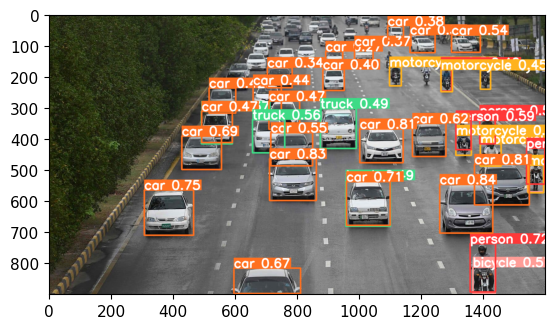

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()